In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse
from pickle import dump, load
import numpy as np

In [16]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.1 MB/s eta 0:00:00


In [17]:
from keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
# from keras.utils import to_categorical
# from tensorflow.keras.utils import add
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout


# small library for seeing the progress of loops.
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

<ipython-input-17-b79a9b673b50>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


0it [00:00, ?it/s]

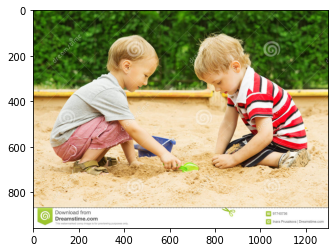

In [11]:
img_to_test = '/content/drive/MyDrive/kids-playing.jpg'
img = plt.imread(img_to_test)
plt.imshow(img)

In [12]:
def extract_features(filename):
    # load the model
    model = Xception( include_top=False, pooling='avg' )
    # re-structure the model
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # load the photo
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

In [27]:
def int2word(tokenizer,integer):
  for word,index in tokenizer.word_index.items():
    if index==integer:
      return word
  return None

In [25]:
def predict_desc(model,tokenizer,photo,max_len):
  in_seq = 'startseq'
  for i in range(max_len):
    seq = tokenizer.texts_to_sequences([in_seq])[0]
    seq = pad_sequences([seq],maxlen=max_len)
    y_hat = model.predict([photo,seq],verbose=0)
    y_hat = np.argmax(y_hat)
    word = int2word(tokenizer,y_hat)
    if word==None:
      break
    in_seq = in_seq+' '+word
    if word=='endseq':
      break
  return in_seq

In [ ]:
max_length = 32
tokenizer = load(open("/content/drive/MyDrive/ML/tokenizer.p","rb"))
model = load_model('/content/drive/MyDrive/ML/models/model_5.h5')
xception_model = Xception(include_top=False, pooling="avg")
photo = extract_features(img_to_test)
img = Image.open(img_to_test)
# description = generate_desc(model, tokenizer, photo, max_length)
description = predict_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)




startseq the little boy in the red shirt is running in the grass end end end end end end of the fence end end end end of the fence end end end end
